# Ordinary Least Squares

is the most common estimation method for linear models. 
The purpose of this package is to help in checking the assumptions of OLS Linear Regression. If the assumptions hold true, the OLS procedure creates the best possible estimates. In statistics, estimators that produce unbiased estimates that have the smallest variance are referred to as being “efficient.” Efficiency is a statistical concept that compares the quality of the estimates calculated by different procedures while holding the sample size constant. OLS is the most efficient linear regression estimator when the assumptions are satisfied.

## The assumptions of OLS Linear Regression:

1. Regression model is linear in the coefficients and the error term.
2. The error term has mean of 0.
3. All independent variables are uncorrelated with the error term.
4. Observations of the error term are uncorrelated with each other.
5. The error term has a constant variance.
6. No independent variable is a perfect linear function of other explanatory variables.
7. The error term is normally distributed.

With the provided class you can check all mentioned assumptions.

Firstly, you need to load CheckOLSAssumption class.

## Loading a class

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import pandas as pd

In [3]:
from check_ols_assumptions import CheckOLSAssumptions

Secondly, you need to load the data which will be used for modelling.

## Loading dataset

In [4]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


You need to specify Independent variables' data frame or array (should be without Intercept variable) and target variable.

In [5]:
data = boston
target = boston_dataset.target

Subsequently, you need to instantiate the class.
## Instantiating a class

In [6]:
colsa = CheckOLSAssumptions(data=boston,
                            target=target,
                            alpha=0.05,
                            vif_threshold=5,
                            max_independent_variables_to_show=10,
                            min_fulfill_ratio=0.5,
                            silent_mode=False)

Then, if you want to check all the assumptions at once:

## Checking all OLS assumptions

Checking the assumptions of OLS regression 

In each of the following assumptions that will be checked, the following conventions have been adopted: 
- the green color means that the assumption is fulfilled,
- the red color means that the assumption is not fulfilled.

Below you can find the summary of the model: 

                            OLS Regression Results                            
Dep. Variable:        target variable   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     102.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.86e-125
Time:                        23:15:10   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          12               

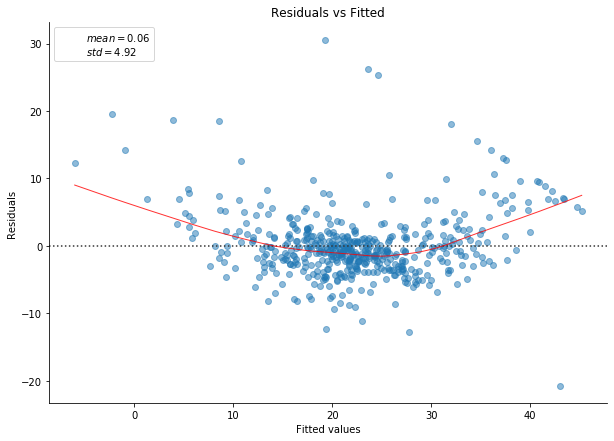

2. Check Actual vs Fitted plot.

The points on Actual vs Fitted plot should be randomly dispersed around the red line.

The situation when the points are not randomly dispersed on any of those two plots, gives the first signal that some of the models' assumptions can be violated. 



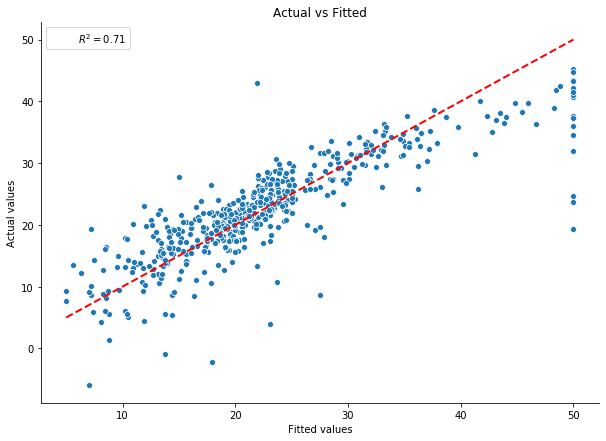

3. Check if there exists linear or non-linear relationship between the independent variables and target variable. 

If there exists linear relationship:
- the correlation coefficient is listed in green color, otherwise in red color.
- target variable can be explained by including linear terms of independent variables in the model. 

Due to the fact that the dataset contains more than 10 independent variables, there will be showed 5 most and 5 least correlated ones.
- If you want to see more independent variables, please change the class' parameter: max_independent_variables_to_show to the required number.

The most correlated independent variables: 

Variable LSTAT: Pearson's correlation: -0.7377


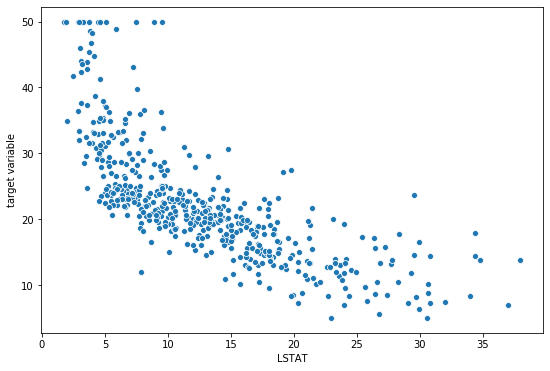

Variable RM: Pearson's correlation: 0.6954


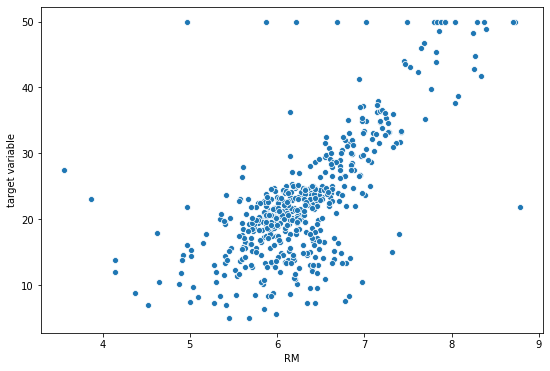

Variable PTRATIO: Pearson's correlation: -0.5078


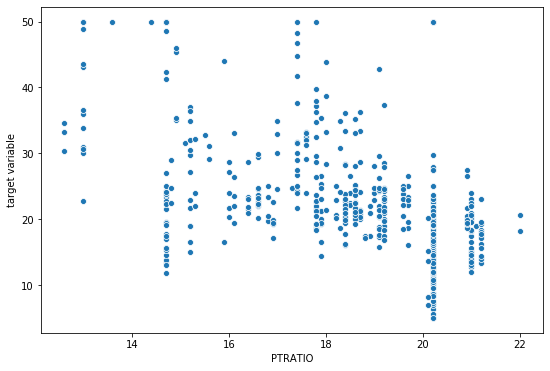

Variable INDUS: Pearson's correlation: -0.4837


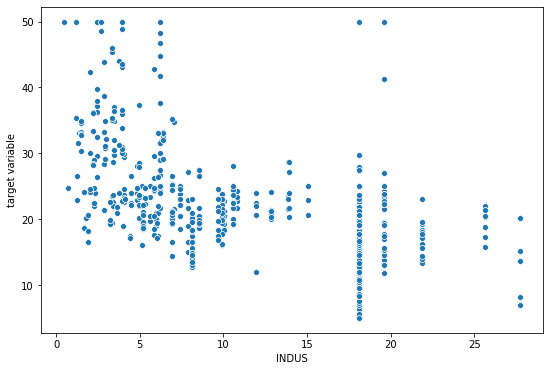

Variable TAX: Pearson's correlation: -0.4685


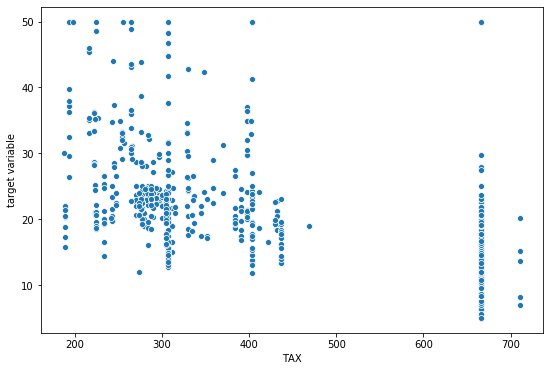

The least correlated independent variables: 

Variable AGE: Pearson's correlation: -0.3770


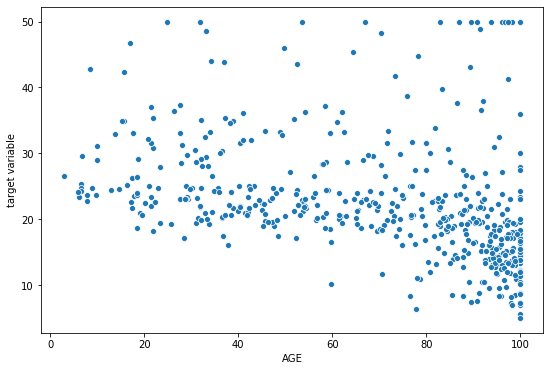

Variable ZN: Pearson's correlation: 0.3604


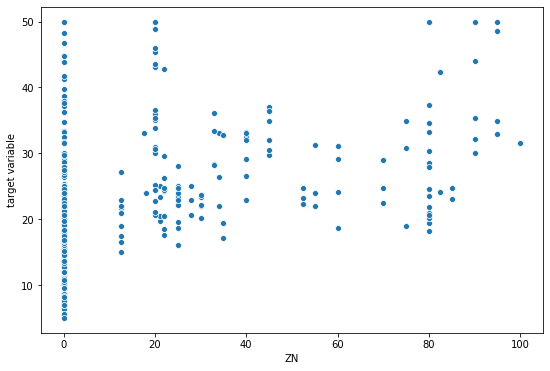

Variable B: Pearson's correlation: 0.3335


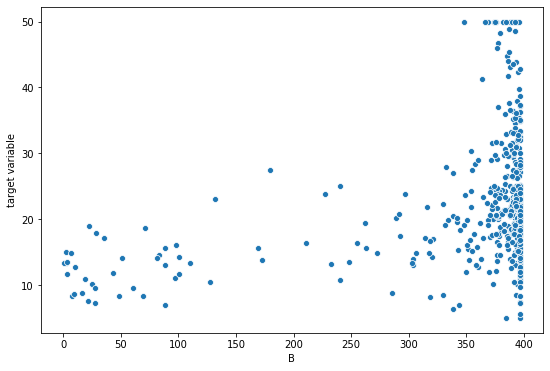

Variable DIS: Pearson's correlation: 0.2499


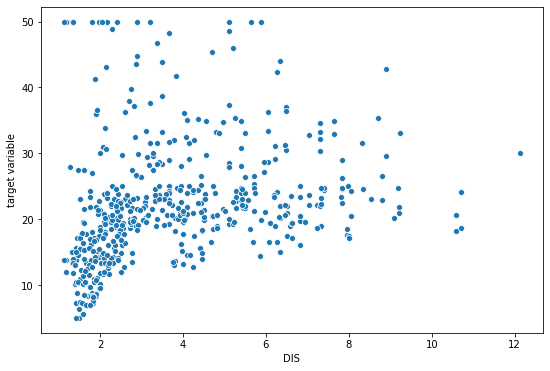

Variable CHAS: Pearson's correlation: 0.1753


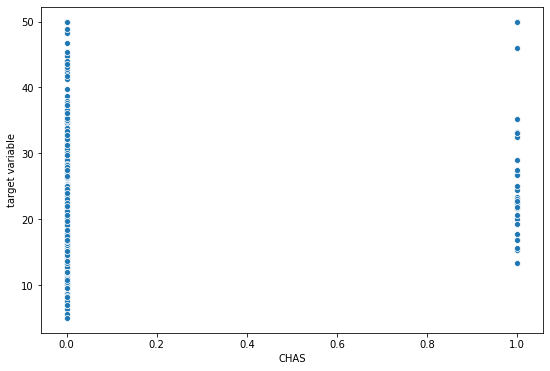

Based on the performed statistical tests, the assumption is satisfied.

Assumption 2. The error term has mean of 0. 

This assumption affects on: 
 - prediction 
 - interpretation 

If the average error is +7, this non-zero error indicates that our model systematically underpredicts the observed values. Statisticians refer to systematic error like this as bias, and it signifies that our model is inadequate because it is not correct on average.

Mean value of the error term is  0.0623 

Based on one sample t-test for mean: 

We can't reject the null hypothesis that mean of the error term is equal to 0. => Assumption satisfied

Based on the performed statistical tests, the assumption is satisfied.

Assumption 3. All independent variables are uncorrelated with the error term. 

This assumption affects on: 
 - prediction 
 - interpretation 

If an independent variable is correlated with the error term, we can use the independent variable to predict the error term, which violates the notion

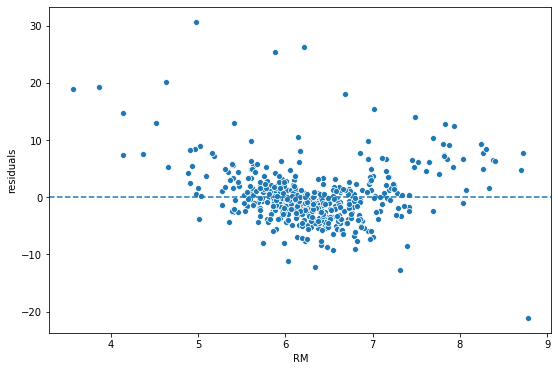

Variable PTRATIO: Pearson's correlation: -0.1081


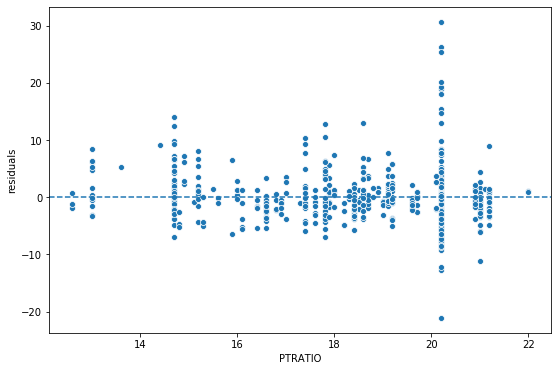

Variable NOX: Pearson's correlation: -0.0607


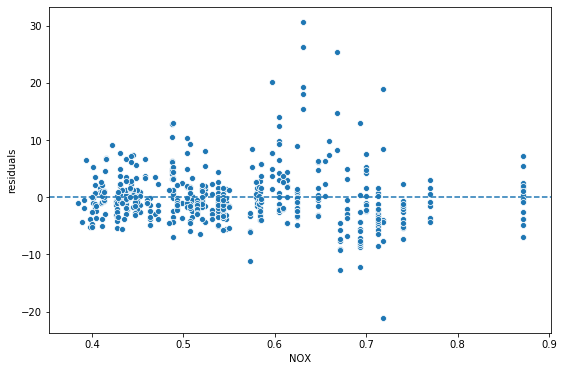

Variable B: Pearson's correlation: -0.0496


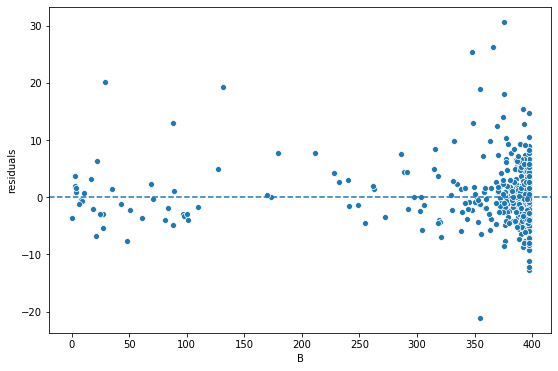

Variable AGE: Pearson's correlation: -0.0309


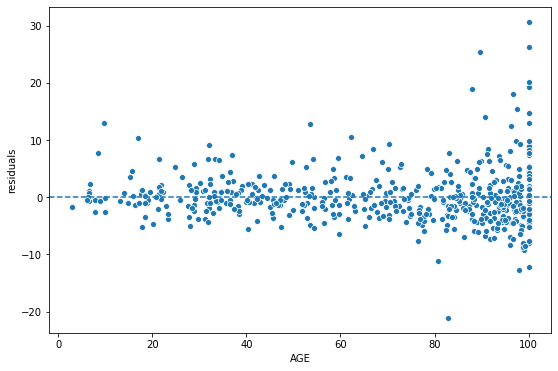

Variable TAX: Pearson's correlation: -0.0307


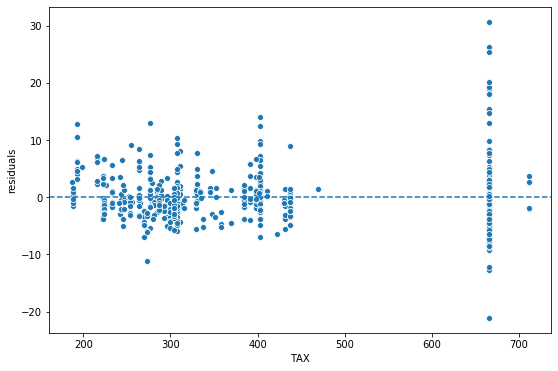

Variable DIS: Pearson's correlation: -0.0229


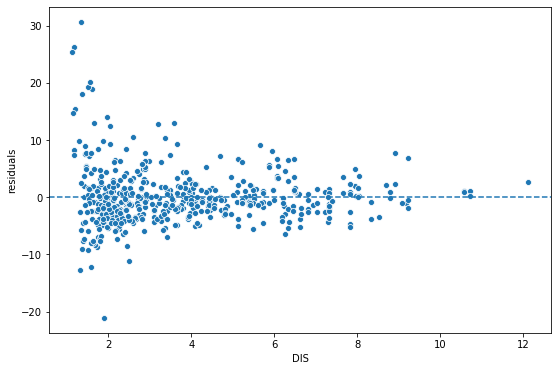

Variable LSTAT: Pearson's correlation: -0.0225


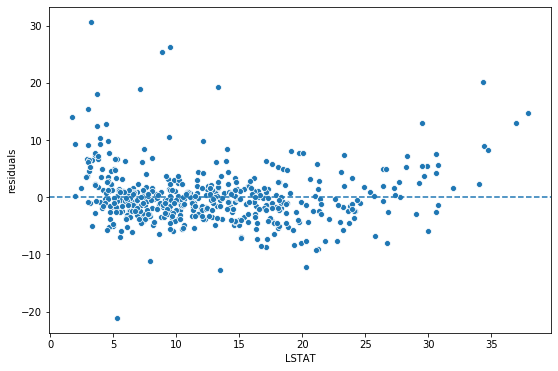

Variable INDUS: Pearson's correlation: -0.0206


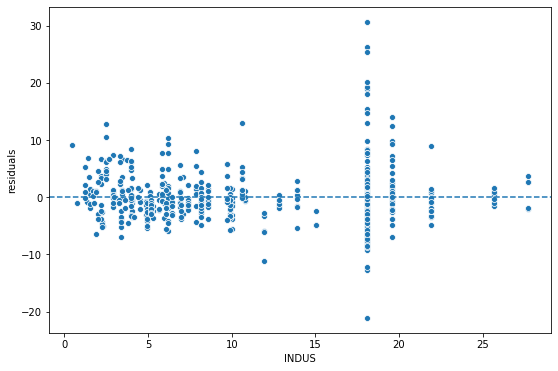

Variable RAD: Pearson's correlation: -0.0139


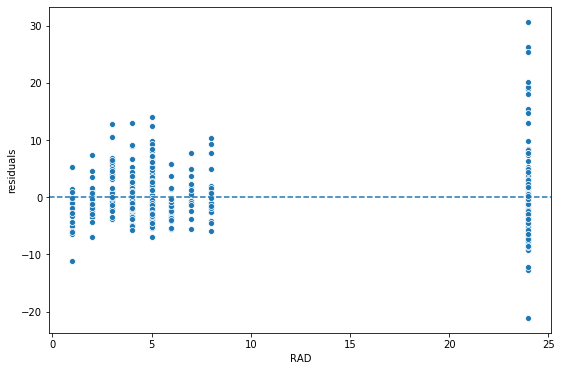

Based on the performed statistical tests, the assumption is not satisfied.

Assumption 4. Observations of the error term are uncorrelated with each other. 

This assumption affects on: 
 - prediction 
 - interpretation. 

One observation of the error term should not predict the next observation. To resolve this issue, you might need to add an independent variable to the model that captures this information. Analysts commonly use distributed lag models, which use both current values of the dependent variable and past values of independent variables.

Durbin-Watson statistical test: 
 If the value of the statistics equals 2 => no serial correlation. 
 If the value of the statistics equals 0 => strong positive correlation. 
 If the value of the statistics equals 4 => strong negative correlation. 

The value of Durbin-Watson statistic is 0.9992

Signs of positive autocorrelation => Assumption not satisfied

Breusch-Godfrey Lagrange Multiplier statistical tests: 

                          

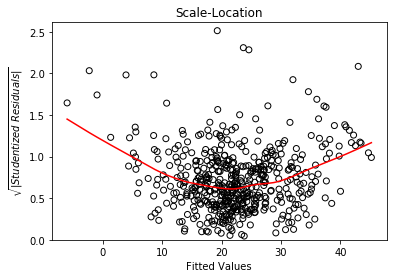

Assumption 6. No independent variable is a perfect linear function of other explanatory variables (no multicollinearity). 

This assumption affects on: 
 - interpretation 

Multicollinearity makes it hard to interpret your coefficients, and it reduces the power of your model to identify independent variables that are statistically significant. In case of appearance of this problem you can try removing some of the highly correlated variables, linearly combine the independent variables, experiment with other analyticla solution (f.g. principal components analysis, LASSO or Ridge regression.)

For a chosen independent variable VIF > 5 when the rest of independent variables explain this variable by linear regression model with R^2 > 0.80 => there exists multicollinearity. 

Below you can see the values of the Variance Inflation Factor statistic (variables in green have VIF lower than 5, variables in red have VIF higher than 5): 

Due to the fact that the dataset contains more than 10 indep

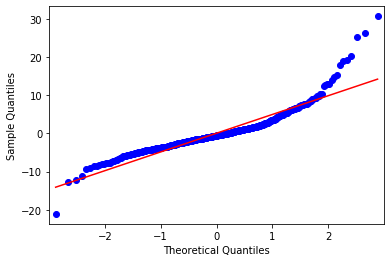

False

In [7]:
colsa.check_all_assumptions()

If you prefer to check the assumptions one by one.

## If you want to check the assumptions separately:

#### 1. Regression model is linear in the coefficients and the error term.

Assumption 1. Regression model is linear in the coefficients and the error term. 

This assumption affects on: 
 - prediction 
 - interpretation 

Residuals vs Fitted and Actual vs Fitted plots 

1. Check Residuals vs Fitted plot. 

The points on Residuals vs Fitted plot should be randomly dispersed around 0, so in the perfect linear model, the red line should be horizontal line y = 0.

An unbiased model has residuals that are randomly scattered around zero. Non-random residual patterns indicate a bad fit despite a high R^2. This type of specification bias occurs when the model is missing significant independent variables, polynomial terms, and interaction terms. 




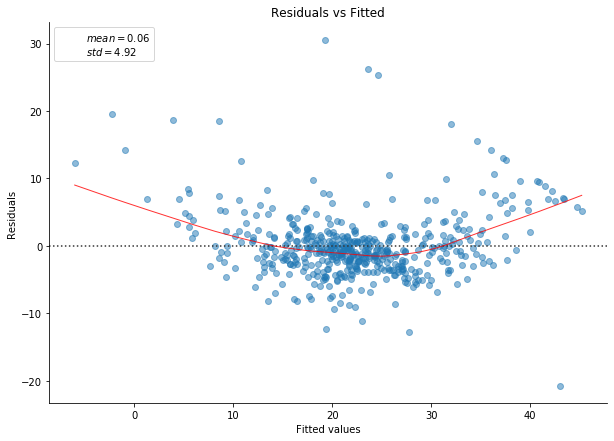

2. Check Actual vs Fitted plot.

The points on Actual vs Fitted plot should be randomly dispersed around the red line.

The situation when the points are not randomly dispersed on any of those two plots, gives the first signal that some of the models' assumptions can be violated. 



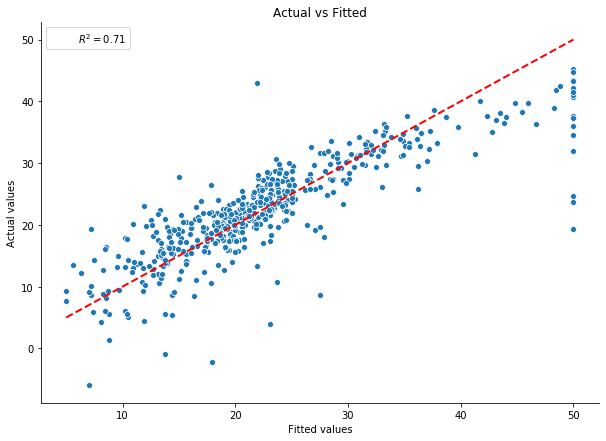

3. Check if there exists linear or non-linear relationship between the independent variables and target variable. 

If there exists linear relationship:
- the correlation coefficient is listed in green color, otherwise in red color.
- target variable can be explained by including linear terms of independent variables in the model. 

Due to the fact that the dataset contains more than 10 independent variables, there will be showed 5 most and 5 least correlated ones.
- If you want to see more independent variables, please change the class' parameter: max_independent_variables_to_show to the required number.

The most correlated independent variables: 

Variable LSTAT: Pearson's correlation: -0.7377


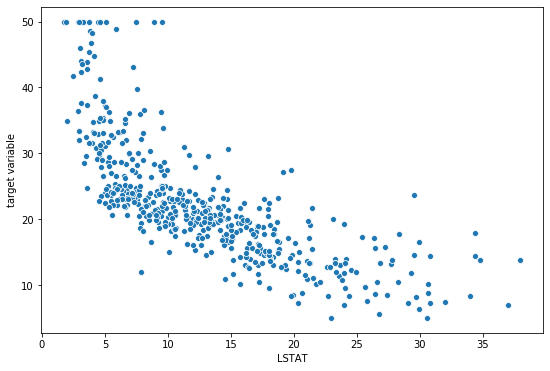

Variable RM: Pearson's correlation: 0.6954


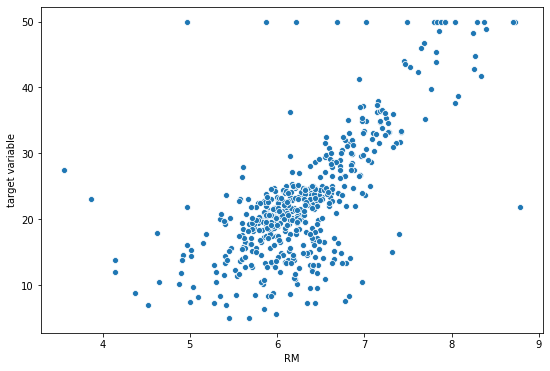

Variable PTRATIO: Pearson's correlation: -0.5078


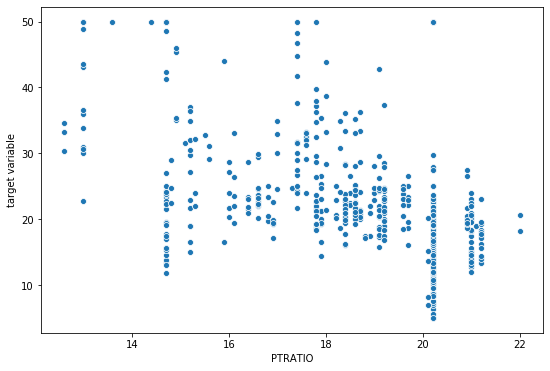

Variable INDUS: Pearson's correlation: -0.4837


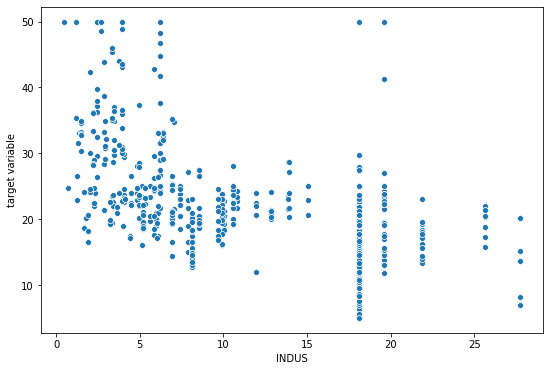

Variable TAX: Pearson's correlation: -0.4685


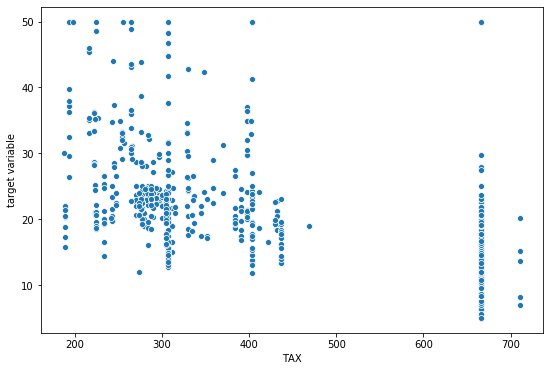

The least correlated independent variables: 

Variable AGE: Pearson's correlation: -0.3770


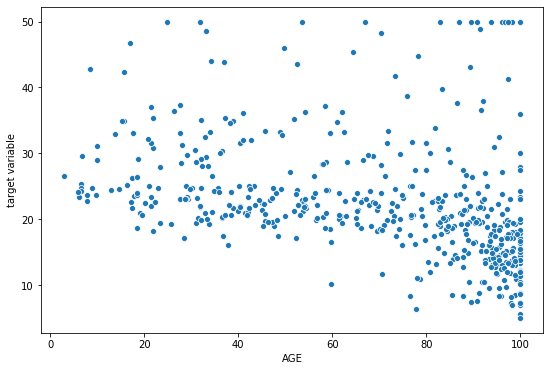

Variable ZN: Pearson's correlation: 0.3604


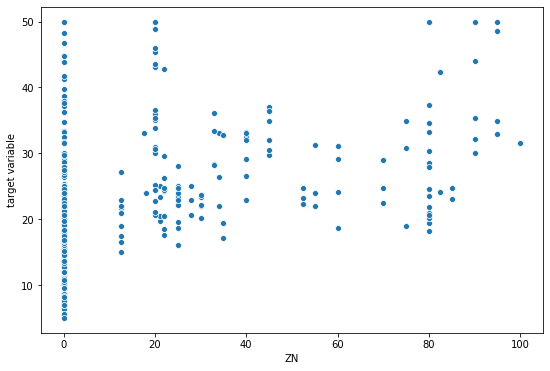

Variable B: Pearson's correlation: 0.3335


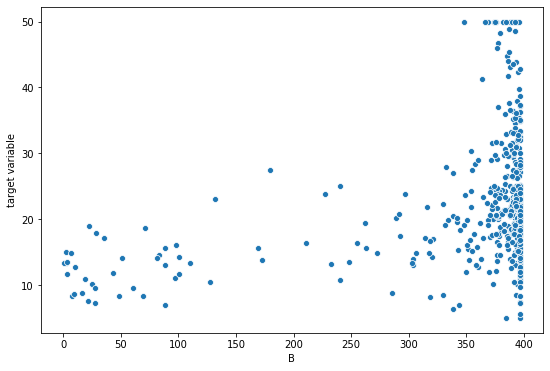

Variable DIS: Pearson's correlation: 0.2499


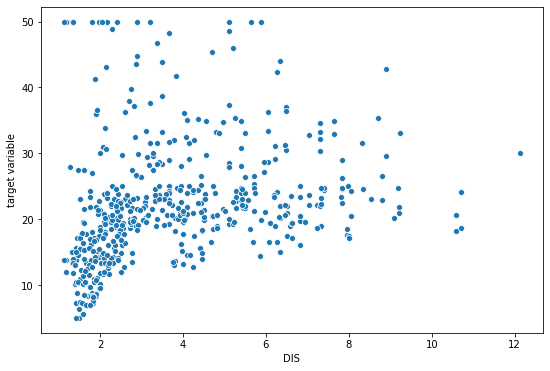

Variable CHAS: Pearson's correlation: 0.1753


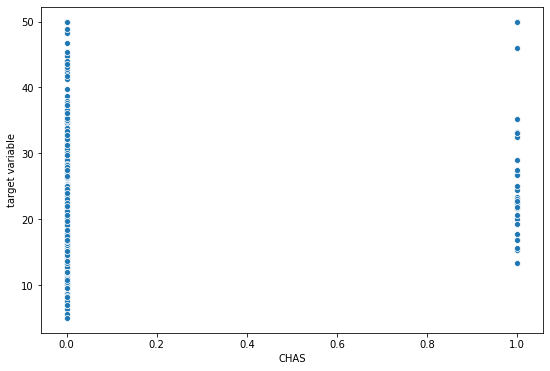

Based on the performed statistical tests, the assumption is satisfied.



True

In [8]:
colsa.check_linearity()

#### 2. The error term has mean of 0.

In [9]:
colsa.check_error_term_zero_mean()

Assumption 2. The error term has mean of 0. 

This assumption affects on: 
 - prediction 
 - interpretation 

If the average error is +7, this non-zero error indicates that our model systematically underpredicts the observed values. Statisticians refer to systematic error like this as bias, and it signifies that our model is inadequate because it is not correct on average.

Mean value of the error term is  0.0623 

Based on one sample t-test for mean: 

We can't reject the null hypothesis that mean of the error term is equal to 0. => Assumption satisfied

Based on the performed statistical tests, the assumption is satisfied.



True

#### 3. All independent variables are uncorrelated with the error term.

Assumption 3. All independent variables are uncorrelated with the error term. 

This assumption affects on: 
 - prediction 
 - interpretation 

If an independent variable is correlated with the error term, we can use the independent variable to predict the error term, which violates the notion that the error term represents unpredictable random error. Violations of this assumption can occur because there is simultaneity between the independent and dependent variables, omitted variable bias, incorrectly modeled curvature, or measurement error in the independent variables.

Check if there exists linear or non-linear relationship of any independent variable with the error term.

If there exists linear relationship:
- the correlation coefficient is listed in red color, otherwise in green color.

Due to the fact that the dataset contains more than 10 independent variables, there will be showed 10 most correlated variables (if there exists significant linear correlation the Pearson's correla

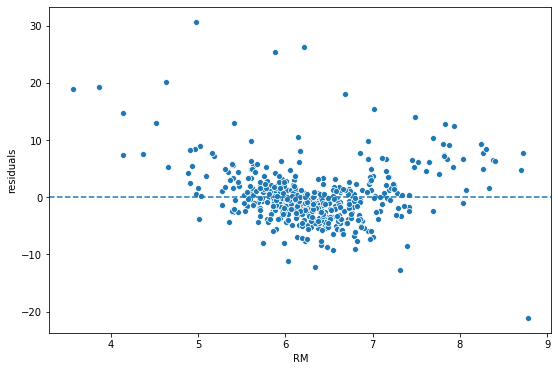

Variable PTRATIO: Pearson's correlation: -0.1081


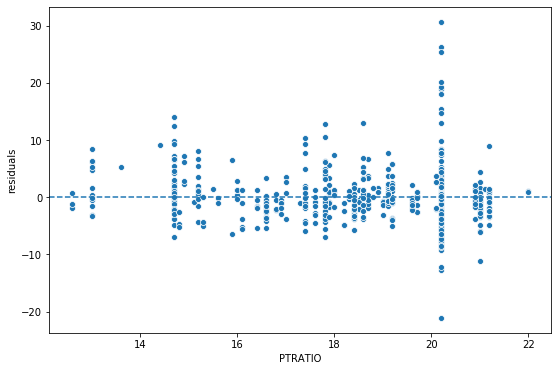

Variable NOX: Pearson's correlation: -0.0607


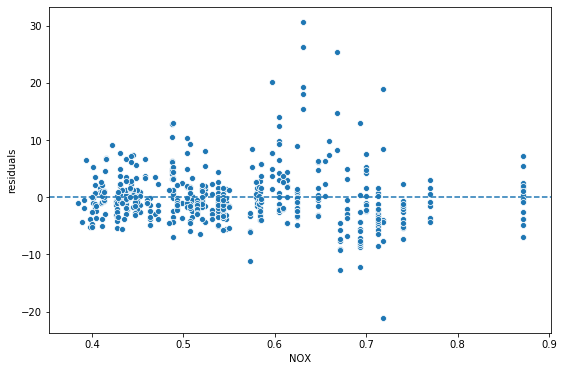

Variable B: Pearson's correlation: -0.0496


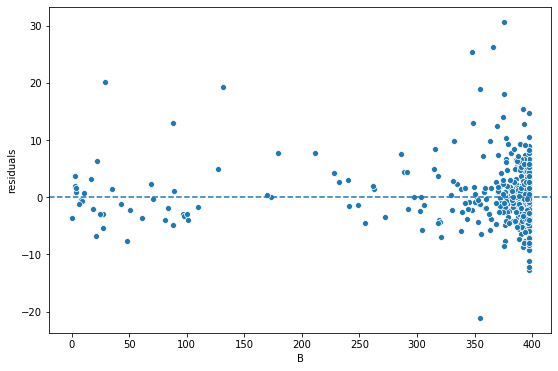

Variable AGE: Pearson's correlation: -0.0309


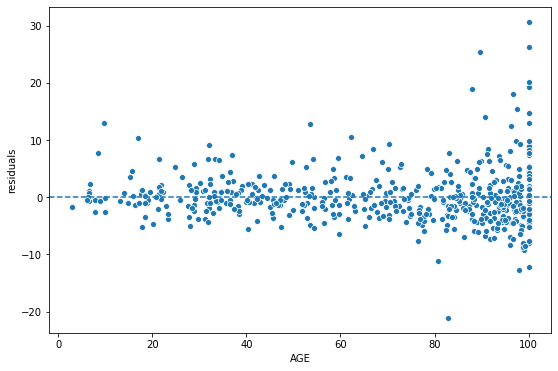

Variable TAX: Pearson's correlation: -0.0307


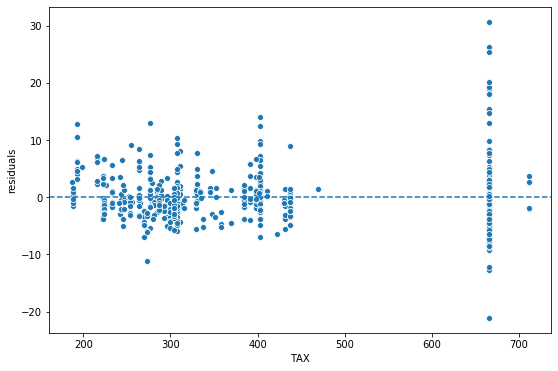

Variable DIS: Pearson's correlation: -0.0229


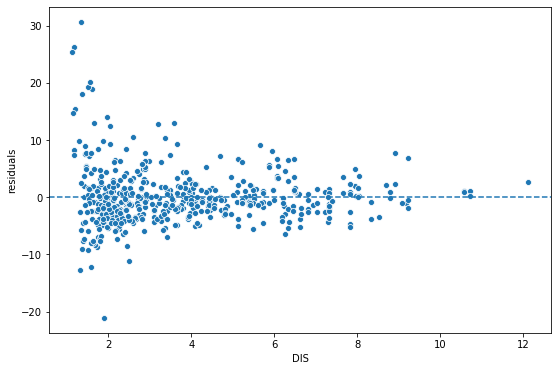

Variable LSTAT: Pearson's correlation: -0.0225


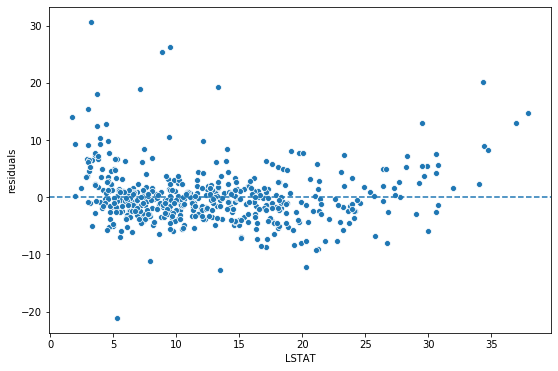

Variable INDUS: Pearson's correlation: -0.0206


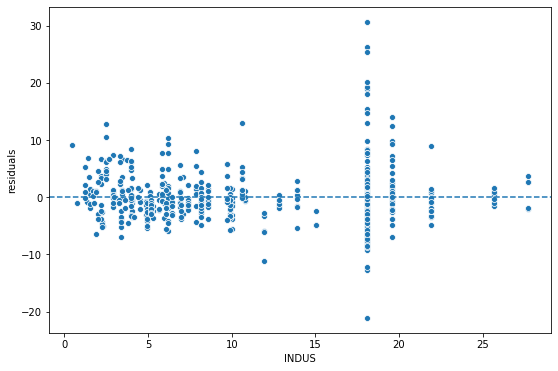

Variable RAD: Pearson's correlation: -0.0139


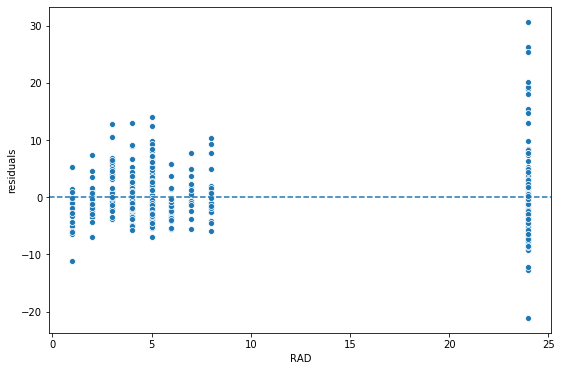

Based on the performed statistical tests, the assumption is not satisfied.



False

In [10]:
colsa.check_independent_variables_vs_error_correlation()

#### 4. Observations of the error term are uncorrelated with each other.

In [11]:
colsa.check_error_term_autocorrelation()

Assumption 4. Observations of the error term are uncorrelated with each other. 

This assumption affects on: 
 - prediction 
 - interpretation. 

One observation of the error term should not predict the next observation. To resolve this issue, you might need to add an independent variable to the model that captures this information. Analysts commonly use distributed lag models, which use both current values of the dependent variable and past values of independent variables.

Durbin-Watson statistical test: 
 If the value of the statistics equals 2 => no serial correlation. 
 If the value of the statistics equals 0 => strong positive correlation. 
 If the value of the statistics equals 4 => strong negative correlation. 

The value of Durbin-Watson statistic is 0.9992

Signs of positive autocorrelation => Assumption not satisfied

Breusch-Godfrey Lagrange Multiplier statistical tests: 

                                      value
Lagrange multiplier statistic  1.861457e+02
p-value       

False

#### 5. The error term has a constant variance.

Assumption 5. The error term has a constant variance. 

This assumption affects on: 
 - prediction 
 - interpretation 

Heteroscedasticity does not cause bias in the coefficient estimates, it does make them less precise. Heteroscedasticity also tends to produce p-values that are smaller than they should be. If you notice this problem in your model, you can try one of this solutions to fix it: redefine independent variable to focus on rates/per capita, try using weighted least squares, experiment with data transformations (f.g. Box-Cox's/Johnson's transformation).

Breusch-Pagan Lagrange Multiplier statistical test: 

                                      value
Lagrange multiplier statistic  1.150324e+02
p-value                        6.019330e-19 

We reject the null hypothesis that error term's variance is constant. => Assumption not satisfied

Goldfeld-Quandt test that examines whether the residual variance is the same in two subsamples: 

                    value
F statistic  3.219

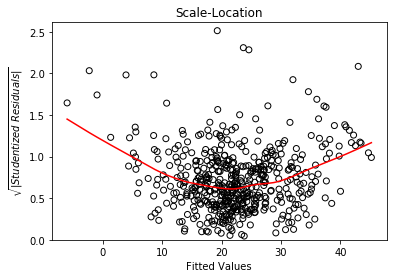

False

In [12]:
colsa.check_error_term_constant_variance()

#### 6. No independent variable is a perfect linear function of other explanatory variables.

In [13]:
colsa.check_linear_dependency_between_independent_variables()

Assumption 6. No independent variable is a perfect linear function of other explanatory variables (no multicollinearity). 

This assumption affects on: 
 - interpretation 

Multicollinearity makes it hard to interpret your coefficients, and it reduces the power of your model to identify independent variables that are statistically significant. In case of appearance of this problem you can try removing some of the highly correlated variables, linearly combine the independent variables, experiment with other analyticla solution (f.g. principal components analysis, LASSO or Ridge regression.)

For a chosen independent variable VIF > 5 when the rest of independent variables explain this variable by linear regression model with R^2 > 0.80 => there exists multicollinearity. 

Below you can see the values of the Variance Inflation Factor statistic (variables in green have VIF lower than 5, variables in red have VIF higher than 5): 

Due to the fact that the dataset contains more than 10 indep

False

#### 7. The error term is normally distributed.

Assumption 7. The error term is normally distributed. 

This assumption affects on: 
 - interpretation 

REMARK: For datasets with sufficiently large sample size, the normality of errors distribution comes from Central Limit Theorem.

OLS does not require that the error term follows a normal distribution to produce unbiased estimates with the minimum variance. However, satisfying this assumption allows you to perform statistical hypothesis testing and generate reliable confidence intervals and prediction intervals. 

Statistical tests for checking normality of the error term distribution: 

Shapiro-Wilk: test statistic: 0.8771, p-value: 1.3768426465823974e-19
We reject the null hypothesis that the error term is normally distributed => Assumption not satisfied

Jarque-Bera: test statistic: 1374.2255, p-value: 0.0
We reject the null hypothesis that the error term is normally distributed => Assumption not satisfied

Omnibus: test statistic: 204.0822, p-value: 4.8318648128794e-45
We reject

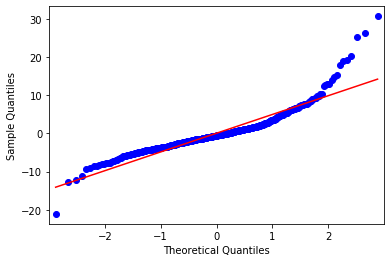

False

In [14]:
colsa.check_error_term_normality()